Se clona el archivo WeatherAUS.csv que se encuentra en un repositorio de GitHub.

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
!git clone "https://github.com/edithro/CODERHOUSE-DATASCIENCE-ANALISIS-DE-LLUVIA.git"

Se importan las librerias necesarias para realizar el análisis pertinente.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Se abre el archivo del repositorio en pandas. Formato Dataframe

In [4]:
df = pd.read_csv("/content/CODERHOUSE-DATASCIENCE-ANALISIS-DE-LLUVIA/weatherAUS.csv")
df['Date'] = df['Date'].astype('datetime64[ns]') #Se cambia el tipo de dato a fecha.
df['Fecha'] = df['Date'] #Se crea la columna Fecha
df =df.sort_values('Date', ascending = True) #Se ordena la columna Date en forma Ascendente
df = df.set_index('Date') #Se establece la columna Date como index

In [ ]:
df.columns #Consulta de columnas del dataframe

In [ ]:
df.shape #Consulta de la forma del dataframe en filas y columnas

In [5]:
df.info() #Consulta detalle del dataframe, se observan tipos y valores faltantes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2007-11-01 to 2017-06-25
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Location       145460 non-null  object        
 1   MinTemp        143975 non-null  float64       
 2   MaxTemp        144199 non-null  float64       
 3   Rainfall       142199 non-null  float64       
 4   Evaporation    82670 non-null   float64       
 5   Sunshine       75625 non-null   float64       
 6   WindGustDir    135134 non-null  object        
 7   WindGustSpeed  135197 non-null  float64       
 8   WindDir9am     134894 non-null  object        
 9   WindDir3pm     141232 non-null  object        
 10  WindSpeed9am   143693 non-null  float64       
 11  WindSpeed3pm   142398 non-null  float64       
 12  Humidity9am    142806 non-null  float64       
 13  Humidity3pm    140953 non-null  float64       
 14  Pressure9am    130395 non-null  floa

In [6]:
df.head() #Visualización de los primeros 5 filas del dataframe

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Fecha
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes,2007-11-01
2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,2007-11-02
2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,2007-11-03
2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2007-11-04
2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No,2007-11-05


Se cambia los campos de tipo objeto a category de las siguientes columnas:

In [7]:
df['Location']=df['Location'].astype('category')
df['WindGustDir']=df['WindGustDir'].astype('category')
df['WindDir9am']=df['WindDir9am'].astype('category')
df['WindDir3pm']=df['WindDir3pm'].astype('category')
df['RainToday']=df['RainToday'].astype('category')
df['RainTomorrow']=df['RainTomorrow'].astype('category')

In [8]:
#Se rellenan con cero los vacios en la colmna Rainfall. Se considera que al no haber medición no hubo precipitaciones.
df['Rainfall'] = df['Rainfall'].fillna(0)

In [ ]:
#Se crea un dataframe a partir del valor agrupado Fecha - Año tomando la totalidad de las precipitaciones por año.
RainFallYear = df.Rainfall.groupby(df.Fecha.dt.year).sum().to_frame()
RainFallYear

<Figure size 900x600 with 0 Axes>

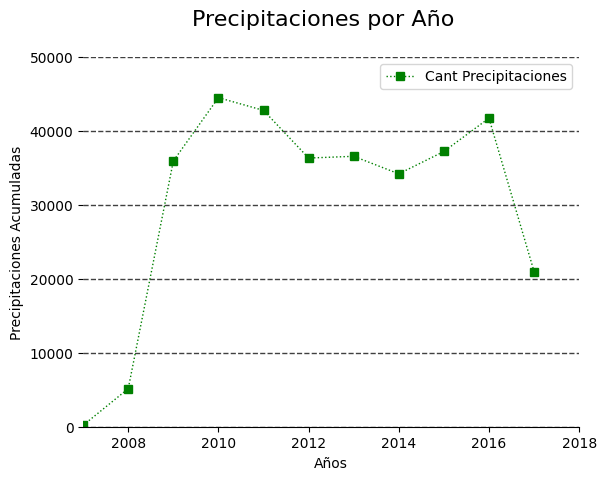

In [10]:
#Se crea un gráfico de línea para determinar la tendencia de la totalidad de las lluvias a lo largo de los años en análisis.
plt.figure(figsize = [9,6])
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams["axes.grid.axis"] = 'y'
plt.rcParams["grid.color"] = "#404040"
plt.figure().suptitle('Precipitaciones por Año', fontsize=16)
plt.plot(RainFallYear.Rainfall,"s:g",linewidth=1)
plt.legend(['Cant Precipitaciones'])
plt.xlabel("Años")
plt.ylabel("Precipitaciones Acumuladas")
plt.xlim(2007,2018)
plt.ylim(0,50000)
plt.show()

De acuerdo a lo observado podemos responder a la hipótesis de que las lluvias en Australia están sufriendo un incremento, parte de las mismas se pueden explicar como consecuencia de el fenómeno de La Niña que propicia condiciones de alta humedad y lluvias intensas. El pico del año 2016 es coincidente con las inundaciones ocurridas en el país. El año 2017 no se considera dentro de análisi debido a que no se cuenta con la totalidad de los datos.

In [ ]:
#Se crea un dataframe a partir del valor agrupado Fecha - MesNro tomando la totalidad de las precipitaciones por mes en cada uno de los años.
RainFallMonth = df.Rainfall.groupby(df.Fecha.dt.month).sum().to_frame()
RainFallMonth

In [ ]:
#Se crea la serie PrecipitacionesAcum a partir del dataframe RainFallMonth y contiene el total de las precipitaciones por mes
PrecipitacionesAcum = RainFallMonth.Rainfall
PrecipitacionesAcum

Text(0.5, 0, 'Mes')

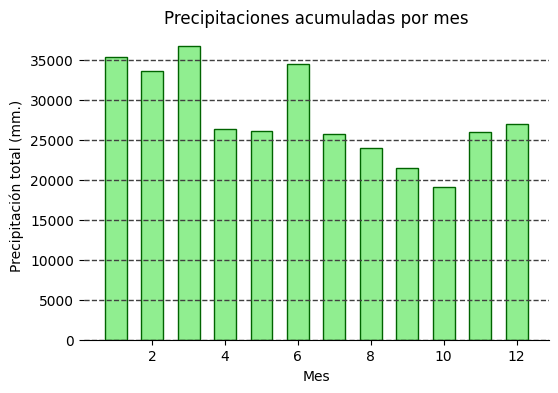

In [13]:
#Se crea grafico de barras con el total de las precipitaciones por acumuladas por mes.
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(RainFallMonth.index, PrecipitacionesAcum, width=0.6, color = "lightgreen", edgecolor = "darkgreen", linewidth = 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Precipitaciones acumuladas por mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

Respondiendo a la hipótesis que plantea determinar una estacionalidad y viendo el grafico resultante, que indica el nivel de precipitacioines acumuladas por mes. Se puede inferir que el primer trimestre del año es la temporada con mayor cantidad de lluvia acumulada, la cual sería coincidente con la temporada de verano.

In [23]:
#Se rellenan los valores faltantes del campo Humidity9am/3pm,Pressure9am/3pm, Cloud9am/3pm, MaxTemp con la media de cada una de las variables.
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

Text(0.5, 0, 'Presión Atmosférica')

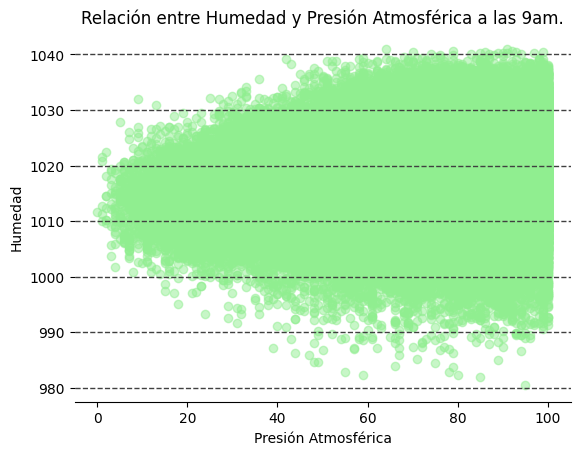

In [15]:
#Se crea los gráficos del tipo scatter para evaluar la relación entre la humedad y la presión atmosférica.
fig, ax = plt.subplots()
ax.scatter(df['Humidity9am'],df['Pressure9am'], alpha=0.5, color = 'lightgreen')
ax.set_title('Relación entre Humedad y Presión Atmosférica a las 9am.')
ax.set_ylabel('Humedad')
ax.set_xlabel('Presión Atmosférica')

Text(0.5, 0, 'Presión Atmosférica')

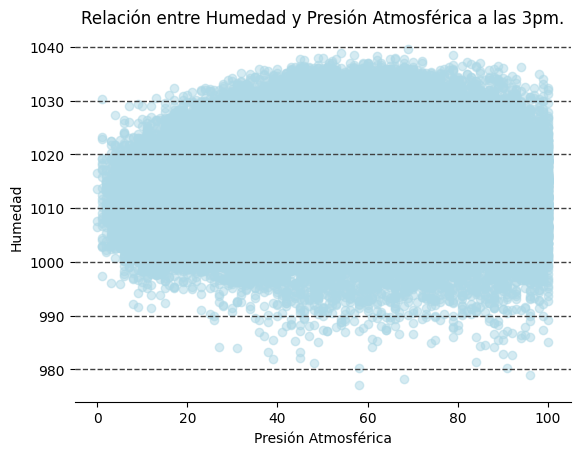

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['Humidity3pm'],df['Pressure3pm'], alpha=0.5, color = 'lightblue')
ax.set_title('Relación entre Humedad y Presión Atmosférica a las 3pm.')
ax.set_ylabel('Humedad')
ax.set_xlabel('Presión Atmosférica')

De los gráficos que determinan la relación entre humedad y presión atmosférica tanto a las 9 am como a las 3pm podríamos inferir que los horarios de mayor frecuencia de agua acumulada se suscitan por la tarde, donde la relación entre ambas es mucho mas marcada.

In [ ]:
#Se crea el dataframe RainFallLocation con las lluvias acumuladas por ciudad
RainFallLocation = df.Rainfall.groupby(df.Location).sum().to_frame()
RainFallLocation = RainFallLocation.sort_values(by='Rainfall', ascending=False)#Se ordena de manera ascendente segun precipitaciones acumuladas
RainFallLocation = RainFallLocation.reset_index(level=0)#Se resetea el indice
RainFallLocation

In [ ]:
#Se crea el datafram RainFallTop a partir de los valores filtrados del datafram RainFallLocation. Se toma como parámetro de filtrado los valores superiores
#a los 6500 ya que contamos con información completo de 8 años y para considerar que la lluvia sea abundante debe superar los 800 a 1000 milimetros.
RainFallTop = RainFallLocation[RainFallLocation['Rainfall']>=6500]
RainFallTop
#Se obtiene un dataframe con 17 ciudades

Text(0.5, 0, 'Ciudad')

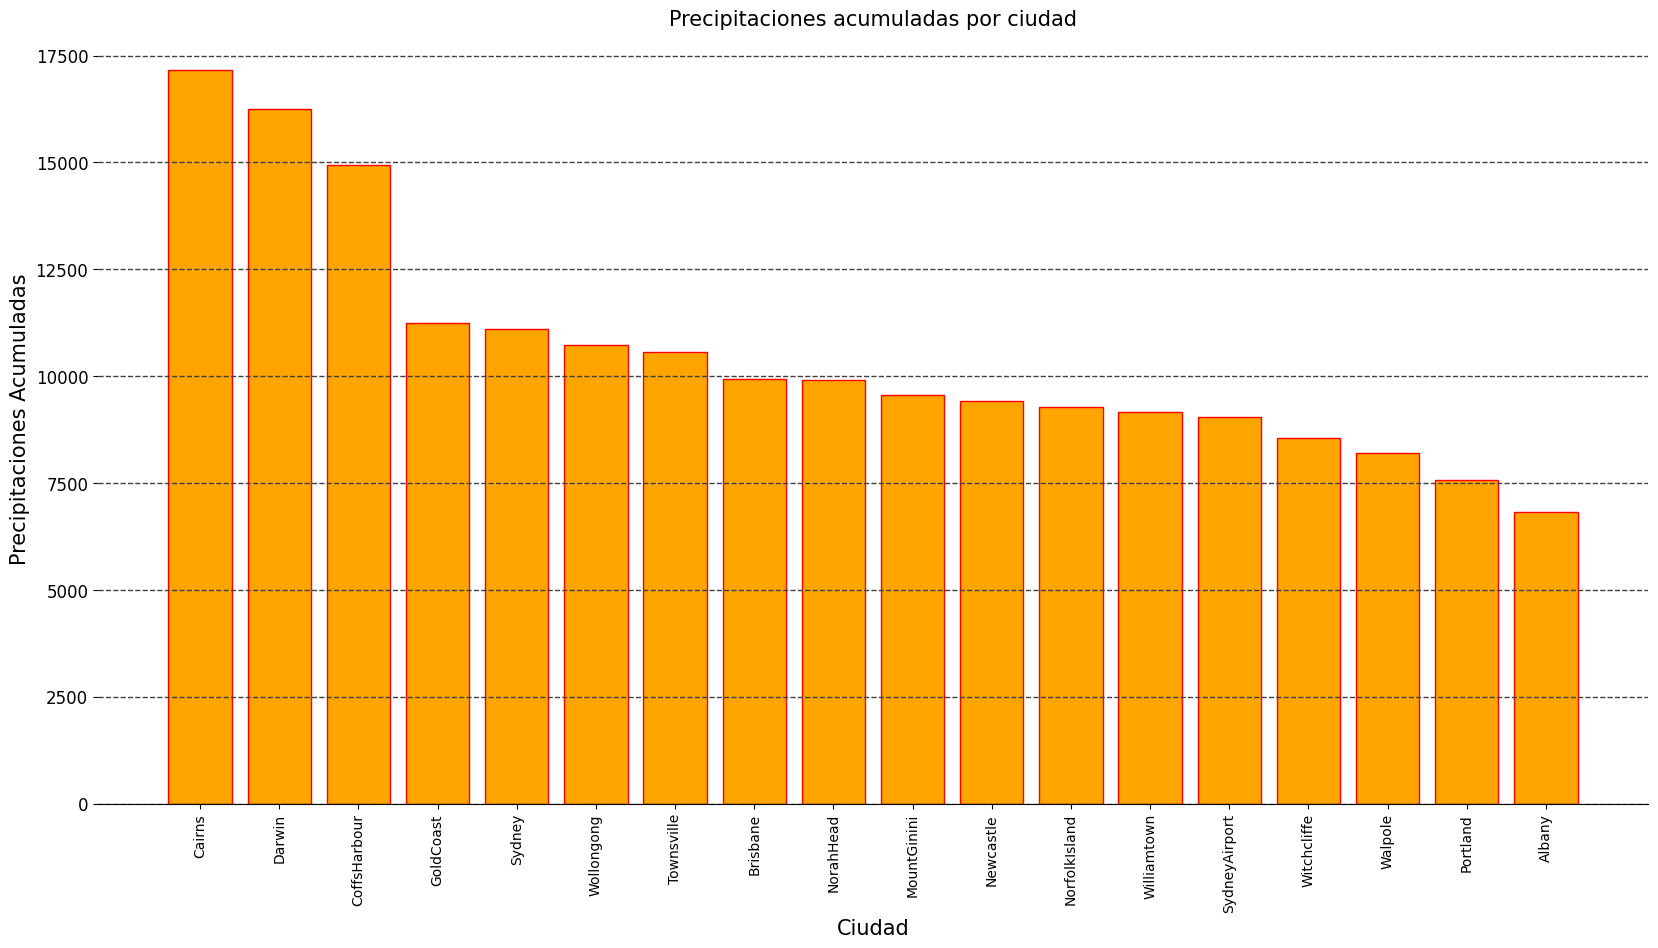

In [26]:
#Se crea un grafico de barras para visualizar el dataframe RainfallTop.
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(RainFallTop.Location, RainFallTop.Rainfall, width=0.8, color = "orange", edgecolor = "red", linewidth = 1)
plt.xticks(size=10,rotation=90)
plt.yticks(size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Precipitaciones acumuladas por ciudad', fontsize =15)
ax.set_ylabel('Precipitaciones Acumuladas', fontsize = 15)
ax.set_xlabel('Ciudad', fontsize = 15)

Del siguiente gráfico podemos determinar que las ciudades donde se da más cantidad de precipitaciones son las ciudades que se encuentran del lado Este y Sureste de Autralia que coincide con los climas Tropical, Subtropical y Templado

In [ ]:
#Se genera un dataframe RainFallCairns y se agrupa la cantidad de lluvia acumulada por año para poder determinar cual es el año con mayor precipitación.
RainFallCairns = df[df['Location']=='Cairns'] #Filtro por Cairns
RainFallCairns2 = RainFallCairns.Rainfall.groupby(RainFallCairns.Fecha.dt.year).sum().to_frame()#Se Agrupa por año
RainFallCairns2
#Del Dataframe RainFallCairns2 surge que el año con mayor cantidad de lluvias en la ciudad de Cairns fue el 2010

In [ ]:
#A partir de los resultados del dataframe anterior, se genera el dataframe RainCairns que contiene los datos del año 2010 de la ciudad Cairns
Rain2010 = df.loc['2010-01-01':'2010-12-31']
RainCairns = Rain2010[Rain2010['Location']=='Cairns']
RainCairns

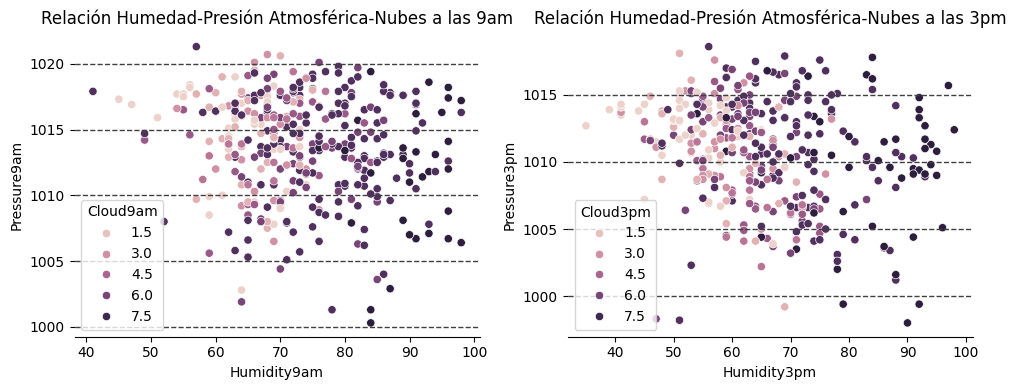

In [22]:
#Se generan dos scatterplot que indican la relacion entre la humedad, la presión atmosférica y la formación de nubes a las 9am y a las 3pm en la ciudad de Cairns.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(data=RainCairns, x="Humidity9am", y="Pressure9am", hue="Cloud9am", ax=axes[0])
sns.scatterplot(data=RainCairns, x="Humidity3pm", y="Pressure3pm", hue="Cloud3pm", ax=axes[1])
axes[0].set_title('Relación Humedad-Presión Atmosférica-Nubes a las 9am')
axes[1].set_title('Relación Humedad-Presión Atmosférica-Nubes a las 3pm')
plt.tight_layout()

La humedad, la presión atmosférica y la formación de nubes están interrelacionadas en el proceso de formación de lluvia. A mayor humedad, la presión atmosférica es propicia y generan condiciones favorables para la generación de precipitaciones.
De lo expuesto y tomando como muestra la ciudad de Cairns y el año 2010 donde se acumuló mayor cantidad de agua, se puede ver claramente que hubo una fuerte formación de nubes propiciadas por una alta humedad y una elevada presión atmosférica especialmente en las mediciones registradas a las 9 am.

Text(0.5, 1.0, 'Histograma Temperatura máxima')

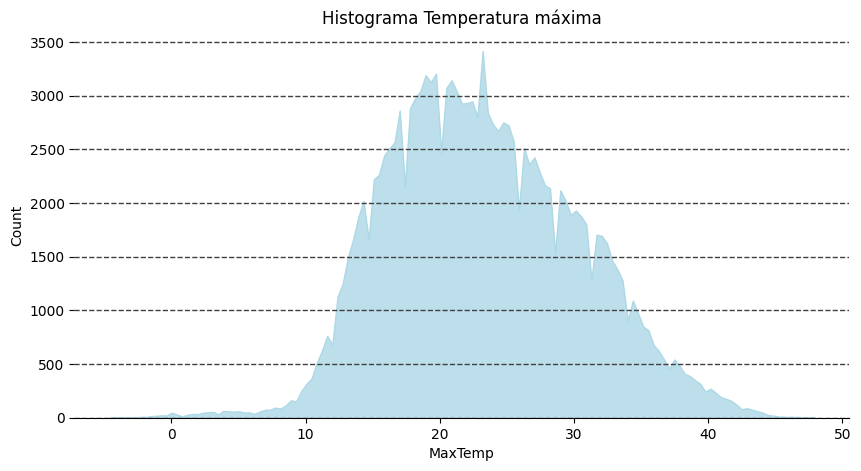

In [41]:
#Se genera un histograma con las temperaturas máximas registradas
f, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="MaxTemp", shrink=.8, alpha=.8, legend=False, element = 'poly', color = 'lightblue', stat = 'count')
plt.title("Histograma Temperatura máxima")

Se Sabe que las temperaturas máximas sumado a las elevada humedad propician la formación de lluvias. Si bien la temperatura promedio en Australia ronda los 22 grados celcius, podemos evidenciar mediante este histograma que tenemos varios periodos con temperaturas superadoras llegan a temperaturas extremas de mas de 35 grados.

Text(0.5, 1.0, 'BoxPlot Temperatura máxima Cairns')

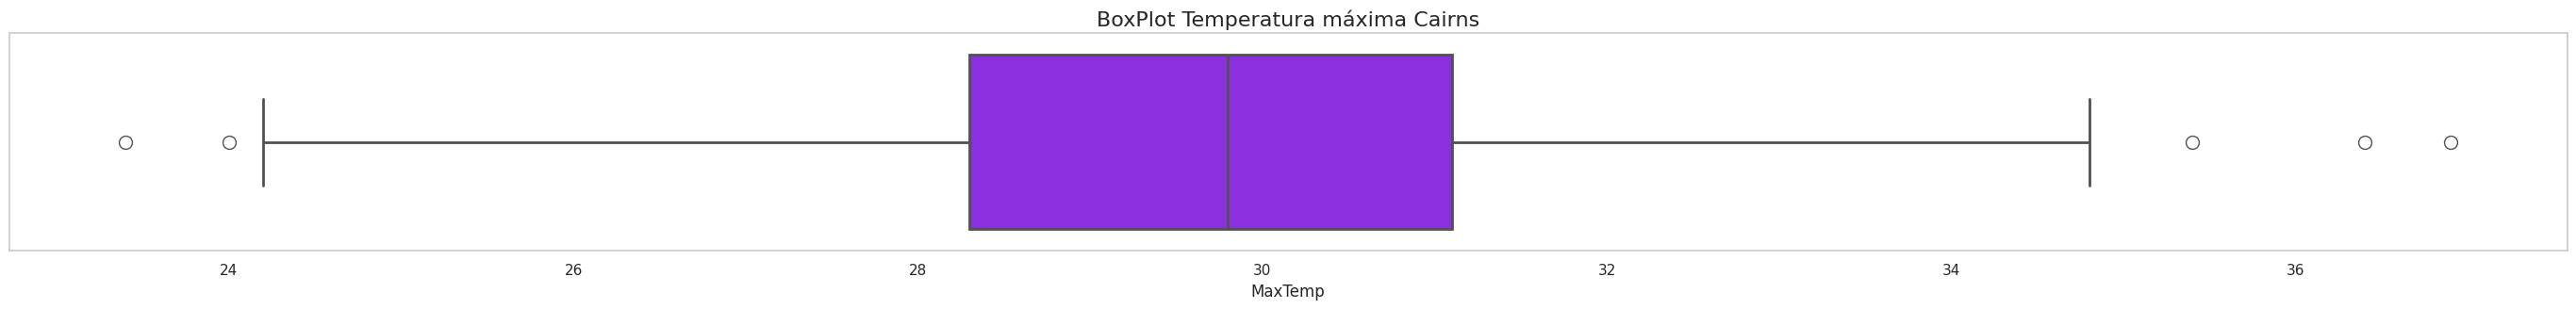

In [51]:
#Se crea un boxplot para observar con mayor detenimientos la existencia de outliers tomando como campo observado, la temperatura máxima.
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(35, 3))
ax = sns.boxplot(x=RainCairns["MaxTemp"], color = 'blueviolet', fliersize = 10, linewidth = 2, saturation = 0.95)
plt.title('BoxPlot Temperatura máxima Cairns', fontsize = 16)

Para poder confirmar lo expuesto en el gráfico anterior, tomamos como ejemplo el dataframe de Cairns y se puede observar que en dicha ciudad se sucedieron temperaturas extremas y considerando la fuerte relación entre humedad y presión atmosférica se hace mas que evidente la probabilidad de precipitaciones.

In [54]:
#Se crea un dataframe RainYearMonth el cual contiene la totalidad de las precipitaciones agrupados por años y por mes
RainYearMonth = df.Rainfall.groupby([df.Fecha.dt.year,df.Fecha.dt.month]).sum().to_frame()
#este dataframe contiene un multiple indice con el mismo nombre Fecha, uno contiene el año y el otro el mes
RainYearMonth=RainYearMonth.reset_index(level=1)#Se resetea el index que contiene la columna mes
RainYearMonth.index.rename('Año', inplace=True)#Se cambia el nombre del index Fecha que contiene el año a Año
RainYearMonth.rename(columns={'Fecha': 'Mes'}, inplace=True)#Se modifica el nombre de la columna Fecha que contiene el mes a Mes
Enero =  RainYearMonth.loc[RainYearMonth['Mes']==1].drop('Mes', axis = 1) #Se crea la serie Enero que contiene las lluvias de enero por año, se elimina la columna Mes
Febrero =  RainYearMonth.loc[RainYearMonth['Mes']==2].drop('Mes', axis = 1)#Se crea la serie Febrero que contiene las lluvias de febrero por año, se elimina la columna Mes
Marzo =  RainYearMonth.loc[RainYearMonth['Mes']==3].drop('Mes', axis = 1)#Se crea la serie Marzo que contiene las lluvias de marzo por año, se elimina la columna Mes

Text(0, 0.5, 'Precipitación (mm.)')

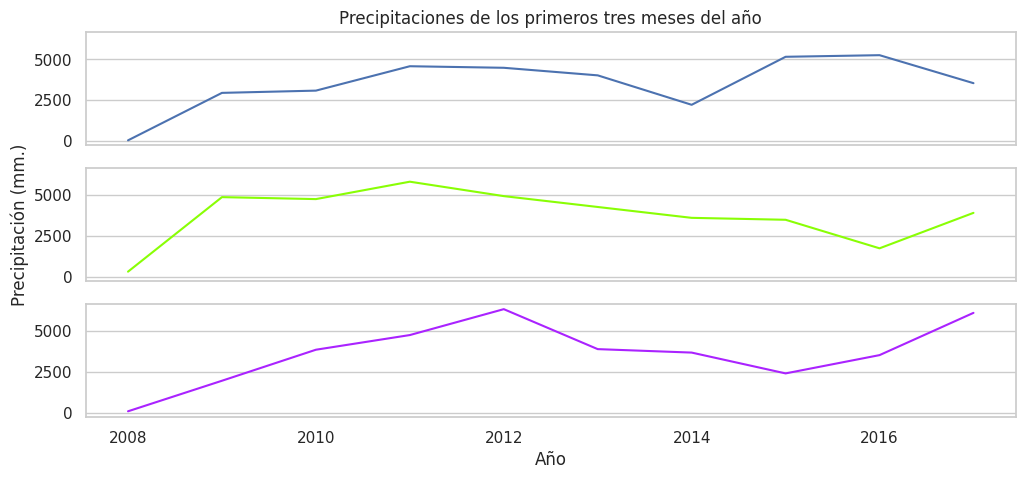

In [53]:
#A raíz de la observación de que el primer trimestre es el trimestre con mayor cantidad de precipitaciones, se busca analizar la tendencia
#de las mismas en los años analizados
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(Enero.index, Enero, label='Precipitaciones de enero')
ax[1].plot(Febrero.index, Febrero, label='Precipitaciones de febrero', color='#89fe05')
ax[2].plot(Marzo.index, Marzo, label='Precipitaciones de marzo', color='#aa23ff')
ax[0].set_title('Precipitaciones de los primeros tres meses del año')
ax[2].set_xlabel('Año')
ax[1].set_ylabel('Precipitación (mm.)')

Si bien del primer gráfico se determinó que el año con mayor precipitacion fue el año 2010, si observamos de manera individual el comportamiento de las lluvias durante el primer trimestre de cada año en particular. Se puede inferir que el año 2012 fue el año con mayor cantidad de lluvia acumulada y que existe una tendencia a una creciente en la cantidad de agua acumulada, fundamentalmente por las precipitaciones caídas durante el mes de Marzo.